In [174]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.coordinates import SkyCoord

from hugs.utils import ra_dec_to_xyz, angular_dist_to_euclidean_dist
from hugs.utils import euclidean_dist_to_angular_dist
from sklearn.neighbors import KDTree

In [192]:
cat = Table.read('/tigress/jgreco/hsc-s18a/hugs-run/'\
                 'hugs-s18a-02/catalog/hugs-s18a-02-vizinspect.csv')

xyz = np.asarray(ra_dec_to_xyz(cat['ra'], cat['dec'])).T

neigh_rad = 30

kdt = KDTree(xyz)
idx, dist = kdt.query_radius(
        xyz, angular_dist_to_euclidean_dist(neigh_rad / 3600.0),
        count_only=False, return_distance=True)

cat['viz-id-merge'] = np.ones(len(cat), dtype=int) * -99

In [209]:
cat['flux_radius_ave_g'][idx[1005]]

8.324484000000002
4.311552000000001
3.3527760000000004
11.141340000000001
4.903752000000001
6.003564000000001


In [211]:
ang_dist = euclidean_dist_to_angular_dist(dist[1005]*3600)
ang_dist[ang_dist>0].mean(), 2*cat['flux_radius_ave_g'][idx[1005]][ang_dist>0].mean()

(19.927892694720335, 13.253486400000003)

In [202]:
found = []

cat['viz-id-merge'] = cat['viz-id']
for i in range(len(idx)):

    if i % 10000 == 0:
        print(i)
        
    if i not in found and (len(idx[i]) >= 5):
        cat['viz-id-merge'][idx[i]] = i + 1
        
    found = np.unique(np.concatenate([found, idx[i]])).astype(int)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000


In [204]:
cat['viz-id-merge']

1
2
3
4
5
6
7
8
9
10
11


In [205]:
len(cat) - np.unique(cat['viz-id-merge']).size

5203

In [142]:
num = [len(idx[i]) for i in range(len(idx))]
num = np.array(num)

In [158]:
v = 1
(num <= v).sum() / len(num), (num <= v).sum() 

(0.5821991822429906, 79738)

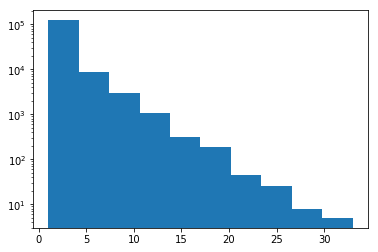

In [145]:
plt.hist(num, bins=10, log=True);

In [66]:
df = cat.to_pandas()

In [ ]:
df.set_index

In [65]:
len(idx)

136960

In [69]:
(sep.arcsec < 35).sum() 

49084

In [71]:
groups = cat[sep.arcsec < 35].copy()

In [77]:
coord[0].separation

<bound method SkyCoord.separation of <SkyCoord (ICRS): (ra, dec) in deg
    (216.9542901, -0.0939788)>>

In [75]:
num = np.array(num) - 1
plt.hist(num, bins='auto')

2

In [38]:
cut = sep.arcmin < 1.0

In [61]:
idx = np.random.choice(np.arange(cut.sum()), 1)
coord[cut][idx]

<SkyCoord (ICRS): (ra, dec) in deg
    [(37.7084456, -3.9885458)]>

In [62]:
cat[cut][idx]

ra,dec,a_image,b_image,theta_image,ellipticity,mag_auto_g,mag_auto_r,mag_auto_i,flux_radius_ave_g,flux_radius_ave_i,mu_ave_g,mu_ave_i,acorr_ratio,g-i,g-r,A_g,A_r,A_i,tract,patch,viz-id
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str3,int64
37.7084456,-3.9885458,6.17,3.891,58.75,0.369,22.8038,22.255,22.0795,5.176500000000001,4.523904,27.964067471126068,26.905849631284042,1.651847184221325,0.9184034563330125,0.6423309486018127,0.08638168064792023,0.06121262924973252,0.04368513698093089,8767,"1,3",122991


In [52]:
idx

array([1586])

In [32]:
idx

array([14513])

In [ ]:
182.6314577, -1.3043262